In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
experiment = "GSE157585_DDS"
comparison = 'young.vs.old'

In [4]:
results_df =  pd.read_csv(f'/home/amore/work/data/{experiment}.csv')
results_df = results_df.set_index('row')
results_df.drop(columns=['Unnamed: 0'],inplace=True)
results_df.index.name = 'GeneName'
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
ENSG00000000003.14,149.426704,0.121380,0.073224,1.657654,9.738736e-02,0.191592
ENSG00000000005.5,0.393251,-0.235871,0.970147,-0.243129,8.079054e-01,0.878101
ENSG00000000419.12,749.234649,0.174446,0.060409,2.887740,3.880204e-03,0.014142
ENSG00000000457.13,185.053873,-0.112755,0.060629,-1.859766,6.291867e-02,0.136055
ENSG00000000460.16,73.823558,-0.483851,0.095050,-5.090494,3.571322e-07,0.000005
...,...,...,...,...,...,...
ENSG00000285480.1,7.091148,0.399731,0.250218,1.597529,1.101479e-01,0.210944
ENSG00000285491.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000285505.1,0.315333,1.152163,1.892724,0.608733,5.427015e-01,NaN


In [5]:
ensembl_names = results_df.index
ensembl_names = ensembl_names.to_list()

In [6]:
# Retrieve gene symbols
annot = sc.queries.biomart_annotations("hsapiens",
        ["ensembl_gene_id", "external_gene_name"],
        use_cache=False
    ).set_index("ensembl_gene_id")


In [7]:
ensembl_names = [item for item in ensembl_names if item.split('.')[0] in annot.index]


In [8]:
results_df = results_df.query('index in @ensembl_names')

In [9]:
ensembl_names = [element.split('.')[0] for element in ensembl_names]


In [10]:
# Assign gene symbols
results_df['gene_symbol'] = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]
results_df

/tmp/ipykernel_70848/2304745235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['gene_symbol'] = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
GeneName,,,,,,,
ENSG00000000003.14,149.426704,0.121380,0.073224,1.657654,9.738736e-02,0.191592,TSPAN6
ENSG00000000005.5,0.393251,-0.235871,0.970147,-0.243129,8.079054e-01,0.878101,TNMD
ENSG00000000419.12,749.234649,0.174446,0.060409,2.887740,3.880204e-03,0.014142,DPM1
ENSG00000000457.13,185.053873,-0.112755,0.060629,-1.859766,6.291867e-02,0.136055,SCYL3
ENSG00000000460.16,73.823558,-0.483851,0.095050,-5.090494,3.571322e-07,0.000005,FIRRM
...,...,...,...,...,...,...,...
ENSG00000285480.1,7.091148,0.399731,0.250218,1.597529,1.101479e-01,0.210944,H2BK1
ENSG00000285491.1,0.000000,NaN,NaN,NaN,NaN,NaN,OR1Q1BP
ENSG00000285505.1,0.315333,1.152163,1.892724,0.608733,5.427015e-01,NaN,NaN


In [11]:
results_df.to_csv(f'/home/amore/work/data/{experiment}_gene_symbol.csv')

In [3]:
results_df =  pd.read_csv(f'/home/amore/work/data/{experiment}_gene_symbol.csv')


In [4]:
results_df = results_df.set_index('gene_symbol')
results_df.index.name = 'GeneName'
results_df

,GeneName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,,
TSPAN6,ENSG00000000003.14,149.426704,0.121380,0.073224,1.657654,9.738736e-02,0.191592
TNMD,ENSG00000000005.5,0.393251,-0.235871,0.970147,-0.243129,8.079054e-01,0.878101
DPM1,ENSG00000000419.12,749.234649,0.174446,0.060409,2.887740,3.880204e-03,0.014142
SCYL3,ENSG00000000457.13,185.053873,-0.112755,0.060629,-1.859766,6.291867e-02,0.136055
FIRRM,ENSG00000000460.16,73.823558,-0.483851,0.095050,-5.090494,3.571322e-07,0.000005
...,...,...,...,...,...,...,...
H2BK1,ENSG00000285480.1,7.091148,0.399731,0.250218,1.597529,1.101479e-01,0.210944
OR1Q1BP,ENSG00000285491.1,0.000000,NaN,NaN,NaN,NaN,NaN
NaN,ENSG00000285505.1,0.315333,1.152163,1.892724,0.608733,5.427015e-01,NaN


In [10]:
def make_index_unique(df):
    # Create a dictionary to keep track of the counts
    counts = {}
    
    def unique_index(index):
        if index in counts:
            counts[index] += 1
            return f"{index}_{counts[index]}"
        else:
            counts[index] = 0
            return index
    
    # Apply the unique_index function to each index value
    new_index = [unique_index(idx) for idx in df.index]
    df.index = new_index


In [11]:
results_df = results_df[results_df.index.notnull()]
results_df

,GeneName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,,
TSPAN6,ENSG00000000003.14,149.426704,0.121380,0.073224,1.657654,9.738736e-02,0.191592
TNMD,ENSG00000000005.5,0.393251,-0.235871,0.970147,-0.243129,8.079054e-01,0.878101
DPM1,ENSG00000000419.12,749.234649,0.174446,0.060409,2.887740,3.880204e-03,0.014142
SCYL3,ENSG00000000457.13,185.053873,-0.112755,0.060629,-1.859766,6.291867e-02,0.136055
FIRRM,ENSG00000000460.16,73.823558,-0.483851,0.095050,-5.090494,3.571322e-07,0.000005
...,...,...,...,...,...,...,...
TUSC2P1,ENSG00000285470.1,0.021386,0.111950,3.371051,0.033209,9.735077e-01,NaN
OR4M2-OT1,ENSG00000285472.1,0.108992,-0.254595,2.237489,-0.113786,9.094075e-01,NaN
H2BK1,ENSG00000285480.1,7.091148,0.399731,0.250218,1.597529,1.101479e-01,0.210944


In [12]:

make_index_unique(results_df)

In [13]:
results_df = results_df.dropna()
results_df

,GeneName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,ENSG00000000003.14,149.426704,0.121380,0.073224,1.657654,9.738736e-02,0.191592
TNMD,ENSG00000000005.5,0.393251,-0.235871,0.970147,-0.243129,8.079054e-01,0.878101
DPM1,ENSG00000000419.12,749.234649,0.174446,0.060409,2.887740,3.880204e-03,0.014142
SCYL3,ENSG00000000457.13,185.053873,-0.112755,0.060629,-1.859766,6.291867e-02,0.136055
FIRRM,ENSG00000000460.16,73.823558,-0.483851,0.095050,-5.090494,3.571322e-07,0.000005
...,...,...,...,...,...,...,...
PDGFRL2P,ENSG00000285420.1,48.633665,0.240199,0.116427,2.063093,3.910381e-02,0.093903
POLR2J3_1,ENSG00000285437.1,1230.189099,-0.037909,0.133874,-0.283172,7.770450e-01,0.857956
C4orf36_1,ENSG00000285458.1,89.371993,-0.141983,0.092468,-1.535479,1.246663e-01,0.232157
H2BK1,ENSG00000285480.1,7.091148,0.399731,0.250218,1.597529,1.101479e-01,0.210944


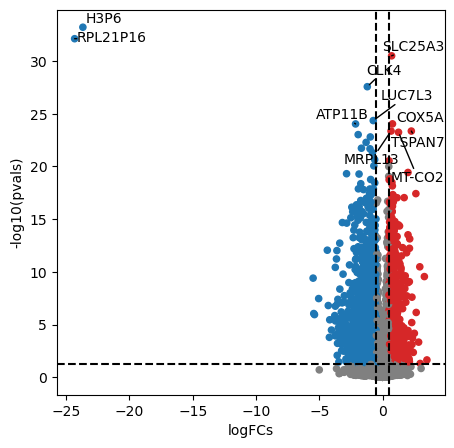

In [17]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=10,
    figsize=(5, 5)
)

In [14]:
mat = results_df[['stat']].T.rename(index={'stat': comparison})
mat

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,ARHGAP11B,THSD1P1,PDE4C_1,OOSP3,ABCF2-H2BK1,PDGFRL2P,POLR2J3_1,C4orf36_1,H2BK1,TBCEL-TECTA
young.vs.old,1.657654,-0.243129,2.88774,-1.859766,-5.090494,1.113153,-3.128741,-0.580938,-4.017369,-5.015667,...,-2.611611,0.785687,1.603115,-0.112615,0.940618,2.063093,-0.283172,-1.535479,1.597529,-0.469672


In [15]:
collectri = dc.get_collectri(organism='human', split_complexes=False)
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [16]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

Running ulm on mat with 1 samples and 19800 targets for 729 sources.


,ABL1,AHR,AHRR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID1B,...,ZNF382,ZNF384,ZNF395,ZNF410,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
young.vs.old,-1.051369,-2.006793,-0.17106,1.217305,-1.943234,-0.036424,0.345412,-1.581481,-2.837698,-1.186342,...,1.822921,-0.43248,-0.528127,0.406875,0.558421,0.563094,0.635809,0.621501,0.121643,-0.559005


In [17]:
tf_df = pd.DataFrame(tf_acts.T)
tf_df['pvals']=tf_pvals.T
tf_df.to_csv(f'results/tf_acts{experiment}_{comparison}.csv')
tf_df

,young.vs.old,pvals
ABL1,-1.051369,0.293102
AHR,-2.006793,0.044785
AHRR,-0.171060,0.864178
AIP,1.217305,0.223503
AIRE,-1.943234,0.052002
...,...,...
ZNF699,0.563094,0.573377
ZNF76,0.635809,0.524908
ZNF804A,0.621501,0.534277
ZNF91,0.121643,0.903183


In [ ]:
values = tf_acts.iloc[0]
values

In [ ]:
down_reg = values.sort_values(ascending=True)[:5].index.to_list()

In [ ]:
up_reg = values.sort_values(ascending=False)[:5].index.to_list()

In [ ]:
up_down_reg = down_reg.copy()

In [ ]:
up_down_reg.extend(up_reg)
up_down_reg

In [ ]:
dc.plot_barplot(
    acts=tf_acts,
    contrast=comparison,
    top=10,
    vertical=True,
    figsize=(3, 3)
)

In [ ]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=up_down_reg,
    n_targets=5,
    node_size=50,
    figsize=(5, 5),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save=f'/home/amore/work/figures/{experiment}_{comparison}_network_TF.jpg'
)

In [ ]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': comparison})
pvals = results_df[['padj']].T.rename(index={'padj': comparison})

# Plot
dc.plot_volcano(
    logFCs,
    pvals,
    comparison,
    name='SRF',
    net=collectri,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5
)

In [18]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny()
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
1395,p53,CCDC150,-3.174527,7.396252e-13
1396,p53,LCE1A,6.154823,8.475458e-13
1397,p53,TREM2,4.101937,9.739648e-13
1398,p53,GDF9,3.355741,1.087433e-12


In [19]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 19800 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
young.vs.old,-1.773631,3.713925,2.243088,-0.267646,-2.387914,-3.059796,-2.464635,-2.541537,0.083973,2.055021,1.922566,0.881156,-0.635003,-2.67845


In [20]:
pathway_df = pd.DataFrame(pathway_acts.T)
pathway_df['pvals']=pathway_pvals.T
pathway_df.to_csv(f'results/pathway_acts_{experiment}_{comparison}.csv')
pathway_df

,young.vs.old,pvals
Androgen,-1.773631,0.076140
EGFR,3.713925,0.000205
Estrogen,2.243088,0.024902
Hypoxia,-0.267646,0.788975
JAK-STAT,-2.387914,0.016954
MAPK,-3.059796,0.002218
NFkB,-2.464635,0.013724
PI3K,-2.541537,0.011044
TGFb,0.083973,0.933079
TNFa,2.055021,0.039890


In [ ]:
dc.plot_barplot(
    pathway_acts,
    comparison,
    top=25,
    vertical=False,
    figsize=(6, 3)
)

In [ ]:
dc.plot_targets(results_df, stat='stat', source_name='TGFb', net=progeny, top=15)


In [ ]:
dc.plot_targets(results_df, stat='stat', source_name='PI3K', net=progeny, top=15)


In [21]:
msigdb = dc.get_resource('MSigDB')
msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [22]:
# Filter by hallmark
#msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
#msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [23]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
0,AAACCAC_MIR140,110,0.472727,0.016931,0.159650,1.287060,5.249407,ACTN4;ADAM9;ANK2;API5;BACH1;BAZ2B;BCL11A;BMT2;...
1,AAAGACA_MIR511,204,0.446078,0.014672,0.144923,1.212789,5.120200,ACE;ADAMTSL3;ADGRF5;ADSS2;AGBL3;AGO4;ALCAM;ANA...
2,AAAGGAT_MIR501,127,0.417323,0.153180,0.561846,1.135882,2.131072,ACACA;ALS2;ATP6V1H;BCL6;BCLAF1;C8orf82;CACHD1;...
3,AAAGGGA_MIR204_MIR211,224,0.433036,0.029254,0.226078,1.176965,4.156719,ADCY6;AGO4;ANKRD13A;ANXA11;AP3M1;APH1A;ARCN1;A...
4,AAANWWTGC_UNKNOWN,194,0.386598,0.337115,0.811601,1.050397,1.142131,AFF4;ANK2;ANK3;BCL11A;BCL6;BNC2;CACNA1D;CDC42E...


In [24]:
enr_pvals.to_csv(f'results/enr_pvals_{experiment}_{comparison}.csv')

In [ ]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.5,
    figsize=(3, 10)
)

In [ ]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='TNFA_SIGNALING_VIA_NFKB'
)

In [ ]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='MYOGENESIS'
)

In [25]:
import liana as ln

liana_lr = ln.resource.select_resource()
liana_lr = ln.resource.explode_complexes(liana_lr)

# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]

# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']

# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1

# Find duplicated rows
duplicates = liana_lr.duplicated()

# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

liana_lr

,interaction,genes,weight
0,LGALS9&PTPRC,LGALS9,1
1,LGALS9&MET,LGALS9,1
2,LGALS9&CD44,LGALS9,1
3,LGALS9&LRP1,LGALS9,1
4,LGALS9&CD47,LGALS9,1
...,...,...,...
5775,BMP2&ACTR2,ACTR2,1
5776,BMP15&ACTR2,ACTR2,1
5777,CSF1&CSF3R,CSF3R,1
5778,IL36G&IFNAR1,IFNAR1,1


In [26]:
# Infer lr activities with ulm
lr_score, lr_pvalue = dc.run_ulm(
    mat=mat,
    net=liana_lr,
    source='interaction',
    target='genes',
    min_n=2,
    verbose=True
)

Running ulm on mat with 1 samples and 19800 targets for 3492 sources.


In [ ]:
dc.plot_barplot(lr_score, comparison, top=25, vertical=True)


In [27]:
lr_df = pd.DataFrame(lr_score.T)
lr_df['pvals']=lr_pvalue.T
lr_df.to_csv(f'results/lr_score_{experiment}_{comparison}.csv')
lr_df

,young.vs.old,pvals
A2M&LRP1,1.042549,0.297170
ACE&BDKRB2,0.652072,0.514362
ACTR2&ADRB2,-1.556365,0.119637
ACTR2&LDLR,-0.970608,0.331755
ADA&DPP4,1.198852,0.230600
...,...,...
ZG16B&TLR5,0.101176,0.919412
ZG16B&TLR6,-0.849479,0.395625
ZP3&CHRNA7,-0.096076,0.923461
ZP3&EGFR,0.308846,0.757442
